DATA CREATION

In [2]:
import pandas as pd
import numpy as np

np.random.seed(42)
n = 1000

cities = ['Delhi', 'Mumbai', 'Bangalore', 'Kolkata', 'Chennai', 'Hyderabad', 'Ahmedabad']
data = {
    'Order_ID': range(1, n + 1),
    'City': np.random.choice(cities, n),
    'Delivery_Time': np.random.normal(4, 1.5, n).clip(1, 10),  # in days
    'Is_Delayed': np.random.choice([0, 1], n, p=[0.8, 0.2])  # 20% delayed
}

df = pd.DataFrame(data)
df.to_csv("delivery_data.csv", index=False)


## Tasks:
1. For each city, calculate:
    - Average delivery time
    - % of delayed orders

2. Identify which cities are underperforming

3. Visualize performance using:
    - Bar chart for average delivery time
    - Horizontal bar or map-based view (if possible) for delay %

4. Suggest 2 data-driven logistics recommendations


In [3]:
df.head()

,Order_ID,City,Delivery_Time,Is_Delayed
0,1,Ahmedabad,5.472321,1
1,2,Kolkata,4.496051,1
2,3,Chennai,3.977923,0
3,4,Ahmedabad,5.194608,0
4,5,Bangalore,3.577922,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order_ID       1000 non-null   int64  
 1   City           1000 non-null   object 
 2   Delivery_Time  1000 non-null   float64
 3   Is_Delayed     1000 non-null   int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 31.4+ KB


In [5]:
df['City'].value_counts()

City
Kolkata      156
Delhi        156
Chennai      148
Ahmedabad    138
Mumbai       137
Hyderabad    135
Bangalore    130
Name: count, dtype: int64

In [7]:
city_perf = df.groupby('City').agg({
    'Delivery_Time': 'mean',
    'Is_Delayed': 'mean'
}).rename(columns={'Is_Delayed': 'Delay_Rate'})

city_perf['Delay_Rate'] = (city_perf['Delay_Rate'] * 100).round(2)
city_perf 

,Delivery_Time,Delay_Rate
City,,
Ahmedabad,4.048933,18.12
Bangalore,3.861465,25.38
Chennai,4.119328,22.97
Delhi,4.130123,14.74
Hyderabad,3.728492,22.96
Kolkata,3.836550,17.31
Mumbai,3.997412,16.06


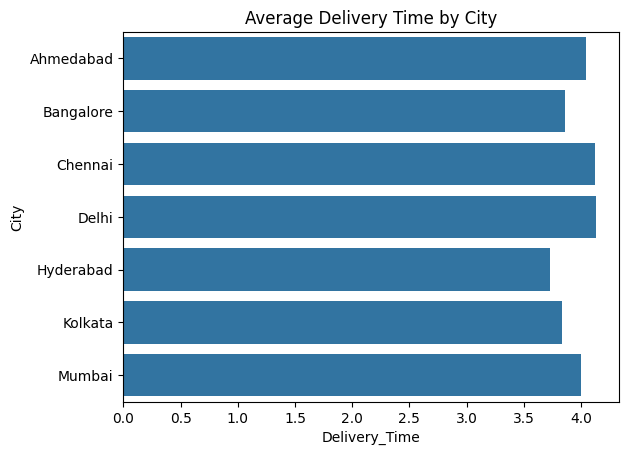

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.barplot(data=city_perf.reset_index(), x='Delivery_Time', y='City')
plt.title('Average Delivery Time by City')
plt.show()

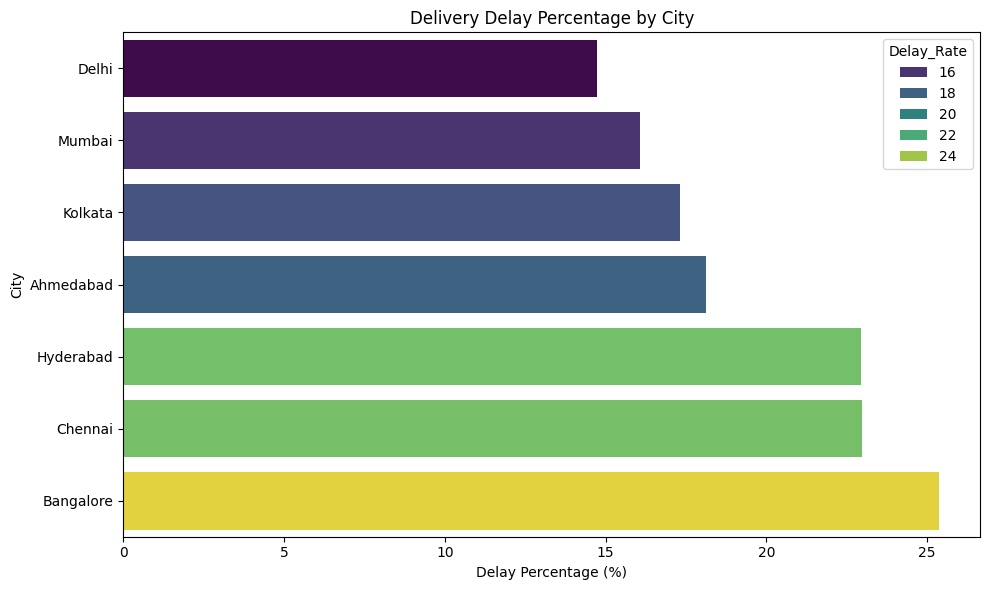

In [22]:
# Horizontal bar plot for delay %
plt.figure(figsize=(10, 6))
sns.barplot(x='Delay_Rate', y=city_perf.index, data=city_perf, hue='Delay_Rate', palette='viridis')
plt.xlabel("Delay Percentage (%)")
plt.ylabel("City")
plt.title("Delivery Delay Percentage by City")
plt.tight_layout()
plt.show()


In [26]:
avg_delay_rate = city_perf['Delay_Rate'].mean()
print(avg_delay_rate)

19.648571428571426


In [28]:
avg_delivery_time = city_perf['Delivery_Time'].mean()
print(avg_delivery_time)

3.9603288672270907


In [38]:
# Set thresholds
avg_time_threshold = 3.7
delay_rate_threshold = 20

# Filter underperformers
underperforming = city_perf[
    (city_perf['Delivery_Time'] > avg_time_threshold) &
    (city_perf['Delay_Rate'] > delay_rate_threshold)
]

print("Underperforming Cities:\n")
print(underperforming.sort_values(by=['Delay_Rate', 'Delivery_Time'], ascending=False))


Underperforming Cities:

           Delivery_Time  Delay_Rate
City                                
Bangalore       3.861465       25.38
Chennai         4.119328       22.97
Hyderabad       3.728492       22.96
